<a href="https://colab.research.google.com/github/jkm243/TSOS/blob/master/Releve_de_compte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the CSV file into a pandas DataFrame
try:
    df = pd.read_csv("/content/my rel.csv", sep=';')
    print("CSV file loaded successfully!")
except FileNotFoundError:
    print("Error: File not found. Please make sure the file is in the correct directory.")
    exit()
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")
    exit()



CSV file loaded successfully!


In [2]:
# Step 2: Data Cleaning and Preprocessing

# a. Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# b. Convert date columns to datetime objects (if needed)
df['Date Opération'] = pd.to_datetime(df['Date Opération'], format='%d.%m.%Y')
df['Date Traitement'] = pd.to_datetime(df['Date Traitement'], format='%d.%m.%Y')

# c. Convert numeric columns
numeric_columns = ['Montant', 'Montant Compte', 'Montant Opération']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '.').astype(float)



Missing values:
Date Opération       0
Date Traitement      0
Montant              0
Montant Compte       0
Montant Opération    0
Description          0
dtype: int64


In [3]:
# Step 3: Basic Exploratory Data Analysis (EDA)

# a. Display the first few rows of the DataFrame
print("\nFirst 5 rows of the DataFrame:")
print(df.head())

# b. Get summary statistics
print("\nSummary statistics:")
print(df.describe())

# c. Check data types of columns
print("\nData types of columns:")
print(df.dtypes)

# d. Frequency of transaction types
print("\nValue counts of 'Description' column:")
print(df['Description'].value_counts())


First 5 rows of the DataFrame:
  Date Opération Date Traitement  Montant  Montant Compte  Montant Opération  \
0     2024-08-12      2024-08-12     0.00             0.0               0.00   
1     2024-08-16      2024-08-16     0.00             0.0               0.00   
2     2024-08-17      2024-08-17     0.00             0.0               0.00   
3     2024-08-19      2024-08-19   500.00             0.0             500.00   
4     2024-08-19      2024-08-19  -793.98             0.0            -793.98   

                    Description  
0  Перевод между своими счетами  
1  Перевод между своими счетами  
2  Перевод между своими счетами  
3         Исходящий перевод СБП  
4                ООО БУРГЕР РУС  

Summary statistics:
                      Date Opération                Date Traitement  \
count                            254                            254   
mean   2024-11-17 16:26:27.401574912  2024-11-17 16:26:27.401574912   
min              2024-08-12 00:00:00            2

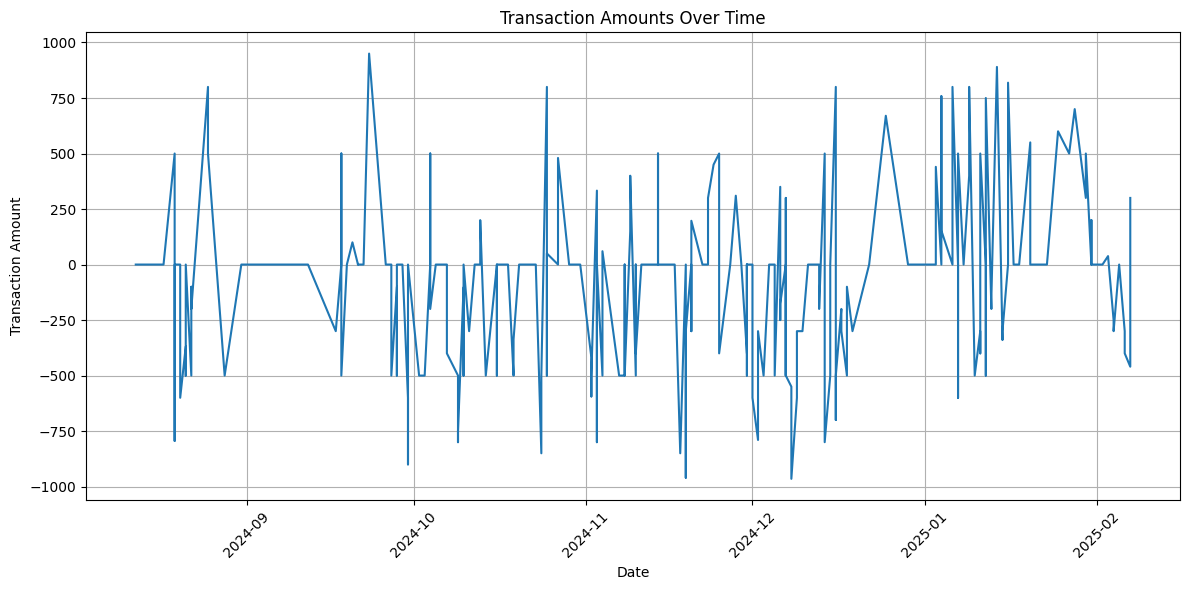

In [4]:
# Step 4: Data Visualization

# a. Transaction Amounts Over Time
plt.figure(figsize=(12, 6))
plt.plot(df['Date Opération'], df['Montant Opération'])
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amounts Over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

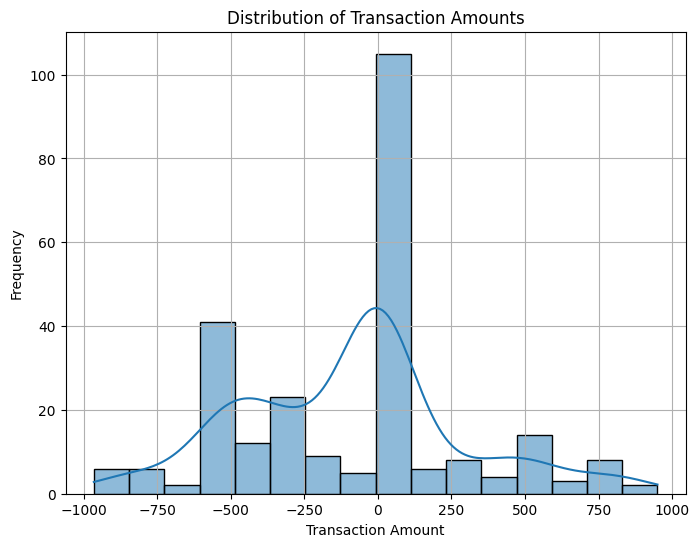

In [5]:
# b. Distribution of Transaction Amounts
plt.figure(figsize=(8, 6))
sns.histplot(df['Montant Opération'], kde=True)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.grid(True)
plt.show()

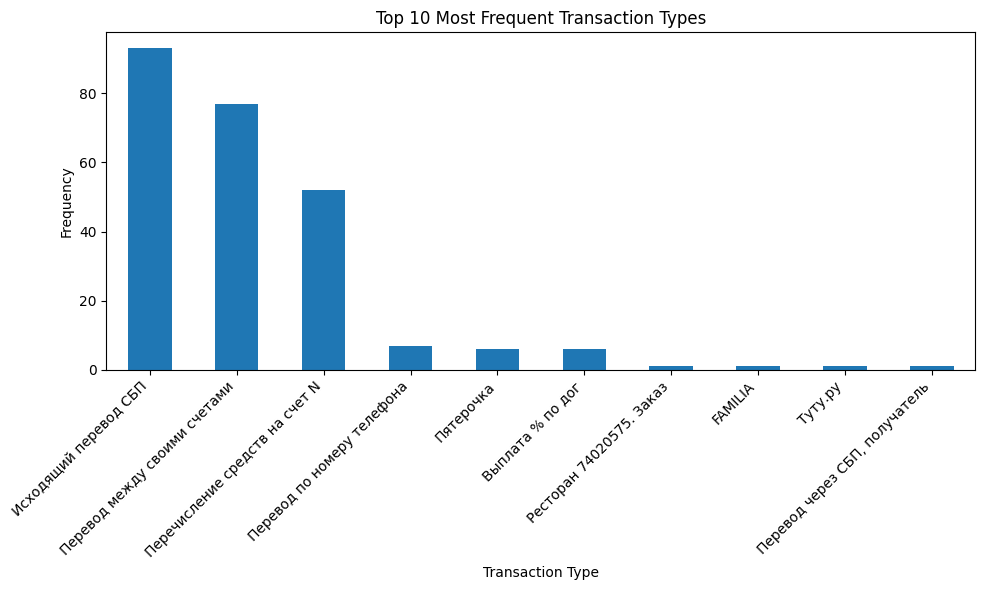

In [6]:
# c. Bar plot of most frequent transaction types
top_transactions = df['Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_transactions.plot(kind='bar')
plt.xlabel('Transaction Type')
plt.ylabel('Frequency')
plt.title('Top 10 Most Frequent Transaction Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

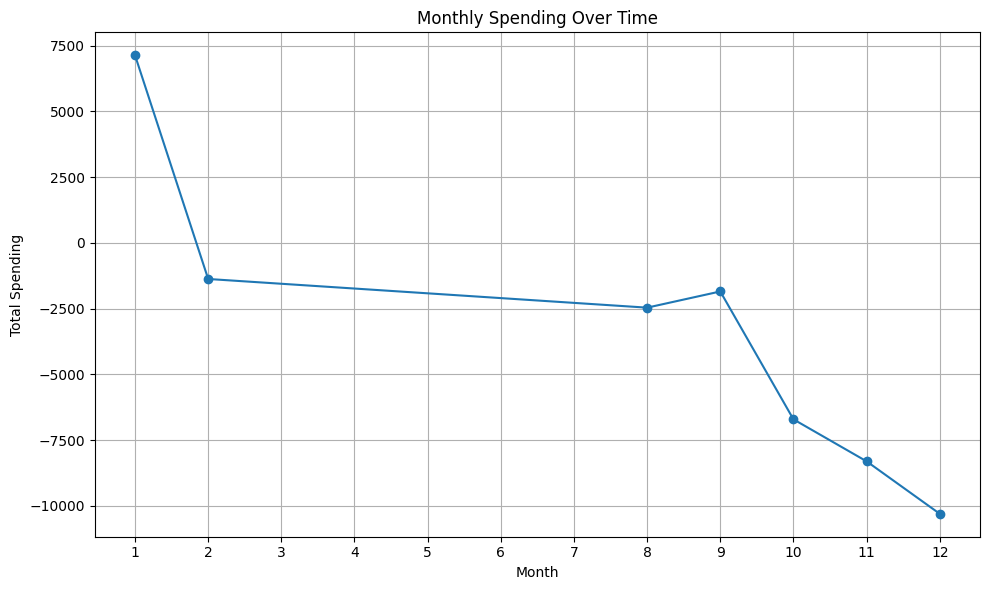

In [7]:
# Step 5: Advanced Analysis (Example: Monthly Spending)

# a. Extract month from 'Date Opération'
df['Month'] = df['Date Opération'].dt.month

# b. Group by month and sum the transaction amounts
monthly_spending = df.groupby('Month')['Montant Opération'].sum()

# c. Plot monthly spending
plt.figure(figsize=(10, 6))
monthly_spending.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Spending')
plt.title('Monthly Spending Over Time')
plt.xticks(range(1, 13))
plt.grid(True)
plt.tight_layout()
plt.show()

In [8]:
try:
    df = pd.read_csv("/content/my rel.csv", sep=';', encoding='utf-8')
    print("CSV file loaded successfully with UTF-8 encoding!")
except UnicodeDecodeError:
    try:
        df = pd.read_csv("/content/my rel.csv", sep=';', encoding='windows-1251')
        print("CSV file loaded successfully with Windows-1251 encoding!")
    except Exception as e:
        print(f"Error loading CSV with both UTF-8 and Windows-1251 encoding: {e}")
        exit()
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}")
    exit()

# Group by transaction type ('Description' column)
grouped_transactions = df.groupby('Description')

# Display all transactions for each group
for transaction_type, group_df in grouped_transactions:
    print(f"\nTransaction Type: {transaction_type}")
    print(group_df)  # Print the DataFrame for the current group

CSV file loaded successfully with UTF-8 encoding!

Transaction Type: Burger King
    Date Opération Date Traitement  Montant Montant Compte Montant Opération  \
164     08.12.2024      08.12.2024  -964,95           0,00           -964,95   

     Description  
164  Burger King  

Transaction Type: FAMILIA
    Date Opération Date Traitement Montant Montant Compte Montant Opération  \
245     03.02.2025      03.02.2025   38,00           0,00             38,00   

    Description  
245     FAMILIA  

Transaction Type: Fix Price
    Date Opération Date Traitement  Montant Montant Compte Montant Opération  \
122     19.11.2024      19.11.2024  -199,00           0,00           -199,00   

    Description  
122   Fix Price  

Transaction Type: L640 Пятерочка
    Date Opération Date Traitement  Montant Montant Compte Montant Opération  \
246     04.02.2025      04.02.2025  -250,47           0,00           -250,47   

        Description  
246  L640 Пятерочка  

Transaction Type: NR ТС Пятерочк